# Mitigate Overfitting
-------

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 

from tensorflow.keras import models, layers, losses, metrics, optimizers
from tensorflow.keras.datasets import imdb

In [2]:
LIMIT_WORDS = 10000

In [3]:
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words = LIMIT_WORDS)

<__array_function__ internals>:5: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
C:\Users\90545\AppData\Roaming\Python\Python38\site-packages\tensorflow\python\keras\datasets\imdb.py:159: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  x_train, y_train = np.array(xs[:idx]), np.array(labels[:idx])
C:\Users\90545\AppData\Roaming\Python\Python38\site-packages\tensorflow\python\keras\datasets\imdb.py:160: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths 

In [4]:
train_data.shape

(25000,)

In [5]:
test_data.shape

(25000,)

In [7]:
train_labels[0]

1

#### Vetorize Examples

In [8]:
def vectorize_sequences(sequences, dimension = LIMIT_WORDS):
    
    result = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        result[i, sequence] = 1
        
    return result

In [9]:
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

In [10]:
x_train.shape

(25000, 10000)

In [11]:
x_test.shape

(25000, 10000)

In [ ]:
x_test[0]

#### Vectorize Labels

In [18]:
y_train = np.asarray(train_labels).astype("float32")
y_test = np.asarray(test_labels).astype("float32")

In [19]:
train_labels

array([1, 0, 0, ..., 0, 1, 0], dtype=int64)

In [20]:
y_train

array([1., 0., 0., ..., 0., 1., 0.], dtype=float32)

In [22]:
def compile_model(model):
    
    model.compile(optimizer = optimizers.RMSprop(lr = 0.001), 
                 loss = losses.binary_crossentropy, 
                 metrics = metrics.binary_accuracy)
    
    return model

In [24]:
def fit_model(model):
    
    x_val = x_train[:10000]
    partial_x_train = x_train[10000:]
    y_val = y_train[:10000]
    partial_y_train = y_train[10000:]
    
    history = model.fit(partial_x_train, 
                       partial_y_train, 
                       epochs = 20,
                       batch_size = 512, 
                       validation_data = (x_val, y_val))
    
    return history

In [25]:
def plot_loss(history):
    
    history_dict = history.history
    
    loss = history_dict["loss"]
    val_loss = history_dict["val_loss"]
    
    acc = history_dict["binary_accuracy"]
    epochs = range(1, len(acc) + 1)
    
    plt.plot(epochs, loss, "bo", label="Training Loss")
    plt.plot(epochs, val_loss, "b", label = "Validation Loss")
    plt.title("Training and Validation Loss")
    plt.xlabel("Epochs")
    plt.ylabel("Loss")
    plt.legend()
    plt.show()

-------------

## Experiment 1

- Replace with a smaller network

Epoch 1/20
30/30 [==============================] - 4s 90ms/step - loss: 0.6472 - binary_accuracy: 0.6722 - val_loss: 0.5527 - val_binary_accuracy: 0.8239
Epoch 2/20
30/30 [==============================] - 3s 89ms/step - loss: 0.5112 - binary_accuracy: 0.8623 - val_loss: 0.4627 - val_binary_accuracy: 0.8466
Epoch 3/20
30/30 [==============================] - 2s 83ms/step - loss: 0.4154 - binary_accuracy: 0.8914 - val_loss: 0.3920 - val_binary_accuracy: 0.8757
Epoch 4/20
30/30 [==============================] - 2s 78ms/step - loss: 0.3337 - binary_accuracy: 0.9114 - val_loss: 0.3390 - val_binary_accuracy: 0.8810
Epoch 5/20
30/30 [==============================] - 2s 76ms/step - loss: 0.2767 - binary_accuracy: 0.9224 - val_loss: 0.3036 - val_binary_accuracy: 0.8866
Epoch 6/20
30/30 [==============================] - 2s 67ms/step - loss: 0.2267 - binary_accuracy: 0.9348 - val_loss: 0.2876 - val_binary_accuracy: 0.8883
Epoch 7/20
30/30 [==============================] - 2s 63ms/step - los

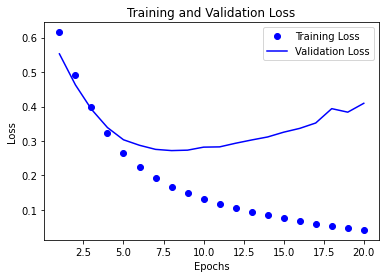

In [33]:
model = models.Sequential()

model.add(layers.Dense(4, activation = "relu", input_shape = (LIMIT_WORDS, )))
model.add(layers.Dense(4, activation = "relu"))
model.add(layers.Dense(1, activation ="sigmoid"))

model = compile_model(model)
history = fit_model(model)
plot_loss(history)

--------------------

## Experiment 2

- Original model

Epoch 1/20
30/30 [==============================] - 11s 213ms/step - loss: 0.5925 - binary_accuracy: 0.7053 - val_loss: 0.3827 - val_binary_accuracy: 0.8712
Epoch 2/20
30/30 [==============================] - 3s 92ms/step - loss: 0.3161 - binary_accuracy: 0.9067 - val_loss: 0.2988 - val_binary_accuracy: 0.8926
Epoch 3/20
30/30 [==============================] - 4s 124ms/step - loss: 0.2179 - binary_accuracy: 0.9327 - val_loss: 0.2889 - val_binary_accuracy: 0.8864
Epoch 4/20
30/30 [==============================] - 4s 144ms/step - loss: 0.1659 - binary_accuracy: 0.9476 - val_loss: 0.2865 - val_binary_accuracy: 0.8873
Epoch 5/20
30/30 [==============================] - 3s 116ms/step - loss: 0.1353 - binary_accuracy: 0.9598 - val_loss: 0.2823 - val_binary_accuracy: 0.8871
Epoch 6/20
30/30 [==============================] - 4s 120ms/step - loss: 0.1079 - binary_accuracy: 0.9697 - val_loss: 0.3050 - val_binary_accuracy: 0.8799
Epoch 7/20
30/30 [==============================] - 3s 106ms/ste

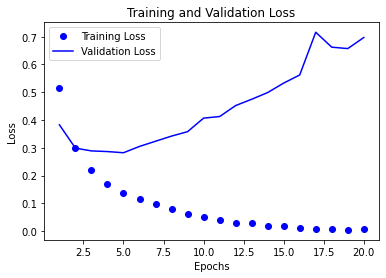

In [35]:
model = models.Sequential()

model.add(layers.Dense(16, activation = "relu", input_shape = (LIMIT_WORDS, )))
model.add(layers.Dense(16, activation = "relu"))
model.add(layers.Dense(1, activation ="sigmoid"))

model = compile_model(model)
history = fit_model(model)
plot_loss(history)

---------------

## Experiment 3

- Replace with a network with higher capacity

Epoch 1/20
30/30 [==============================] - 36s 679ms/step - loss: 0.6779 - binary_accuracy: 0.6942 - val_loss: 0.3344 - val_binary_accuracy: 0.8596
Epoch 2/20
30/30 [==============================] - 17s 582ms/step - loss: 0.2652 - binary_accuracy: 0.8978 - val_loss: 0.2949 - val_binary_accuracy: 0.8828
Epoch 3/20
30/30 [==============================] - 18s 617ms/step - loss: 0.1555 - binary_accuracy: 0.9442 - val_loss: 0.2821 - val_binary_accuracy: 0.8897
Epoch 4/20
30/30 [==============================] - 18s 593ms/step - loss: 0.0800 - binary_accuracy: 0.9772 - val_loss: 0.3419 - val_binary_accuracy: 0.8898
Epoch 5/20
30/30 [==============================] - 17s 558ms/step - loss: 0.0104 - binary_accuracy: 0.9980 - val_loss: 0.4752 - val_binary_accuracy: 0.8822
Epoch 6/20
30/30 [==============================] - 17s 585ms/step - loss: 0.1114 - binary_accuracy: 0.9858 - val_loss: 0.3929 - val_binary_accuracy: 0.8832
Epoch 7/20
30/30 [==============================] - 20s 65

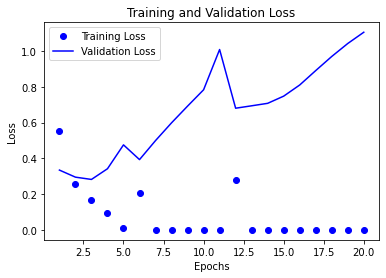

In [36]:
model = models.Sequential()

model.add(layers.Dense(512, activation = "relu", input_shape = (LIMIT_WORDS, )))
model.add(layers.Dense(512, activation = "relu"))
model.add(layers.Dense(1, activation ="sigmoid"))

model = compile_model(model)
history = fit_model(model)
plot_loss(history)

--------------

## Experiment 4

- Add **_weight regularization_**:
    - L1 regularizers make the added cost proportional to the _absolut_value_ of the weight coefficients;
    - L2 regularizers (weight decay), make the added cost proportional to the _square of the value_value_ of the weight coefficients;

#### Add L2 regularization to the original model

- `l2(0.001)` means that every coefficient in the matrix of the layer will add `0.001 * weight_coefficient_value` to the loss of the network at training time 

- The experiment could be repeated using other _Keras_ regularizers like `l1(value)` or `l1_l2(l1=value, l2=value)`, to perform both simultaneously.

In [39]:
from tensorflow.keras import regularizers

Epoch 1/20
30/30 [==============================] - 4s 85ms/step - loss: 0.6133 - binary_accuracy: 0.7297 - val_loss: 0.4109 - val_binary_accuracy: 0.8736
Epoch 2/20
30/30 [==============================] - 4s 131ms/step - loss: 0.3518 - binary_accuracy: 0.9047 - val_loss: 0.3456 - val_binary_accuracy: 0.8875
Epoch 3/20
30/30 [==============================] - 5s 161ms/step - loss: 0.2769 - binary_accuracy: 0.9271 - val_loss: 0.3317 - val_binary_accuracy: 0.8885
Epoch 4/20
30/30 [==============================] - 5s 162ms/step - loss: 0.2364 - binary_accuracy: 0.9394 - val_loss: 0.3310 - val_binary_accuracy: 0.8875
Epoch 5/20
30/30 [==============================] - 5s 163ms/step - loss: 0.2185 - binary_accuracy: 0.9504 - val_loss: 0.3437 - val_binary_accuracy: 0.8806
Epoch 6/20
30/30 [==============================] - 4s 148ms/step - loss: 0.2005 - binary_accuracy: 0.9559 - val_loss: 0.3393 - val_binary_accuracy: 0.8841
Epoch 7/20
30/30 [==============================] - 3s 107ms/step

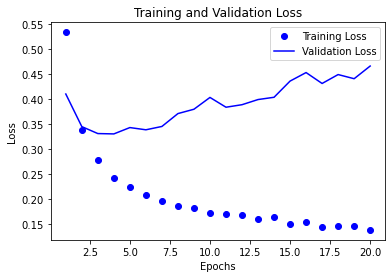

In [41]:
model = models.Sequential()

model.add(layers.Dense(16, kernel_regularizer = regularizers.l2(0.001), 
                       activation = "relu", 
                       input_shape = (LIMIT_WORDS, )))

model.add(layers.Dense(16, kernel_regularizer = regularizers.l2(0.001), activation = "relu"))
model.add(layers.Dense(1, activation ="sigmoid"))

model = compile_model(model)
history = fit_model(model)
plot_loss(history)

--------------

## Experiment 5

- Adding _dropout_. This technique consists in setting to 0 a random ratio of fetures of an activation matrix at training time. Adding noise can cotnribute to break up the learning of irrelevant patterns.

Epoch 1/20
30/30 [==============================] - 12s 241ms/step - loss: 0.6404 - binary_accuracy: 0.6333 - val_loss: 0.4707 - val_binary_accuracy: 0.8621: 2s - loss: 0.6867 - 
Epoch 2/20
30/30 [==============================] - 2s 76ms/step - loss: 0.4705 - binary_accuracy: 0.8088 - val_loss: 0.3609 - val_binary_accuracy: 0.8764
Epoch 3/20
30/30 [==============================] - 3s 101ms/step - loss: 0.3803 - binary_accuracy: 0.8619 - val_loss: 0.3064 - val_binary_accuracy: 0.8857
Epoch 4/20
30/30 [==============================] - 3s 85ms/step - loss: 0.3149 - binary_accuracy: 0.8864 - val_loss: 0.2833 - val_binary_accuracy: 0.8899
Epoch 5/20
30/30 [==============================] - 2s 84ms/step - loss: 0.2562 - binary_accuracy: 0.9178 - val_loss: 0.2722 - val_binary_accuracy: 0.8920
Epoch 6/20
30/30 [==============================] - 3s 89ms/step - loss: 0.2131 - binary_accuracy: 0.9351 - val_loss: 0.2792 - val_binary_accuracy: 0.8893
Epoch 7/20
30/30 [===========================

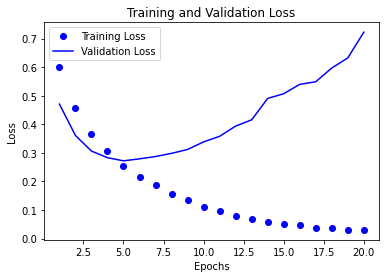

In [43]:
model = models.Sequential()

model.add(layers.Dense(16, activation = "relu", input_shape = (LIMIT_WORDS, )))
model.add(layers.Dropout(0.3))
model.add(layers.Dense(16, activation = "relu"))
model.add(layers.Dropout(0.4))
model.add(layers.Dense(1, activation ="sigmoid"))

model = compile_model(model)
history = fit_model(model)
plot_loss(history)

--------------

## Experiment 6

+ Use dropout and regularizer together in same model.

Epoch 1/20
30/30 [==============================] - 6s 87ms/step - loss: 1.8167 - binary_accuracy: 0.5902 - val_loss: 0.9074 - val_binary_accuracy: 0.7952
Epoch 2/20
30/30 [==============================] - 2s 73ms/step - loss: 0.9020 - binary_accuracy: 0.7152 - val_loss: 0.8421 - val_binary_accuracy: 0.8142
Epoch 3/20
30/30 [==============================] - 2s 63ms/step - loss: 0.8519 - binary_accuracy: 0.7386 - val_loss: 0.8020 - val_binary_accuracy: 0.8454
Epoch 4/20
30/30 [==============================] - 2s 65ms/step - loss: 0.8165 - binary_accuracy: 0.7644 - val_loss: 0.7803 - val_binary_accuracy: 0.8017
Epoch 5/20
30/30 [==============================] - 2s 65ms/step - loss: 0.7775 - binary_accuracy: 0.7772 - val_loss: 0.7236 - val_binary_accuracy: 0.8446
Epoch 6/20
30/30 [==============================] - 2s 65ms/step - loss: 0.7515 - binary_accuracy: 0.7945 - val_loss: 0.7021 - val_binary_accuracy: 0.8353
Epoch 7/20
30/30 [==============================] - 2s 83ms/step - los

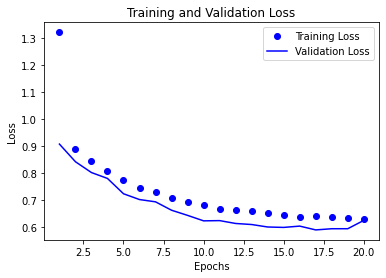

In [45]:
model = models.Sequential()

model.add(layers.Dense(16, kernel_regularizer = regularizers.l1_l2(0.001), 
                       activation = "relu", 
                       input_shape = (LIMIT_WORDS, )))

model.add(layers.Dropout(0.4))

model.add(layers.Dense(16, kernel_regularizer = regularizers.l1_l2(0.001), activation = "relu"))
model.add(layers.Dropout(0.4))
model.add(layers.Dense(1, activation ="sigmoid"))

model = compile_model(model)
history = fit_model(model)
plot_loss(history)

-----------------

## Conclusions
#### What to do in case of overfitting?
- Get more training data
- Reduce the capacity of the network
- Add weight regularization
- Add dropout